In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import random

In [2]:
plt.rcParams["figure.figsize"] = (8,6)

In [3]:
def make_segments(x, y):
    '''
    Create list of line segments from x and y coordinates, in the correct format for LineCollection:
    an array of the form   numlines x (points per line) x 2 (x and y) array
    '''

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    
    return segments


# Interface to LineCollection:

def colorline(x, y, z=None, cmap=plt.get_cmap('copper'), norm=plt.Normalize(0.0, 1.0), linewidth=3, alpha=1.0):
    '''
    Plot a colored line with coordinates x and y
    Optionally specify colors in the array z
    Optionally specify a colormap, a norm function and a line width
    '''
    
    # Default colors equally spaced on [0,1]:
    if z is None:
        z = np.linspace(0.0, 1.0, len(x))
           
    # Special case if a single number:
    if not hasattr(z, "__iter__"):  # to check for numerical input -- this is a hack
        z = np.array([z])
        
    z = np.asarray(z)
    
    segments = make_segments(x, y)
    lc = LineCollection(segments, array=z, cmap=cmap, norm=norm, linewidth=linewidth, alpha=alpha)
    
    ax = plt.gca()
    ax.add_collection(lc)
    
    return lc
        
    
def clear_frame(ax=None): 
    # Taken from a post by Tony S Yu
    if ax is None: 
        ax = plt.gca() 
    ax.xaxis.set_visible(False) 
    ax.yaxis.set_visible(False) 
    for spine in ax.spines.itervalues(): 
        spine.set_visible(False) 

In [20]:
def competing_species_function(r, phi):
    return (r*(1-r*r), 1)

In [21]:
def runge_kutta(iterations, initial, step):
    r_val = [initial[0]]
    phi_val = [initial[1]]
    t_val = [0]
    for i in range(round(iterations/step)):
        r1, phi1 = competing_species_function(r_val[-1], phi_val[-1])
        r2, phi2 = competing_species_function(r_val[-1]+step*r1/2, phi_val[-1]+step*phi1/2)
        r3, phi3 = competing_species_function(r_val[-1]+step*r2/2, phi_val[-1]+step*phi2/2)
        r4, phi4 = competing_species_function(r_val[-1]+step*r3, phi_val[-1]+step*phi3)
        
        r_val.append(r_val[-1]+step*(r1+2*r2+2*r3+r4)/6)
        phi_val.append(phi_val[-1]+step*(phi1+2*phi2+2*phi3+phi4)/6)
        t_val.append(t_val[-1]+step)
    return t_val, r_val, phi_val

In [94]:
iterations = 10000
initial1 = (0.01, 0.01)
initial2 = (1.5, 1.5)
step = 0.1

In [95]:
t_val1, r_val1, phi_val1 = runge_kutta(iterations, initial1, step)
t_val2, r_val2, phi_val2 = runge_kutta(iterations, initial2, step)

In [96]:
x11 = r_val1*np.cos(phi_val1)
x21 = r_val1*np.sin(phi_val1)
x12 = r_val2*np.cos(phi_val2)
x22 = r_val2*np.sin(phi_val2)

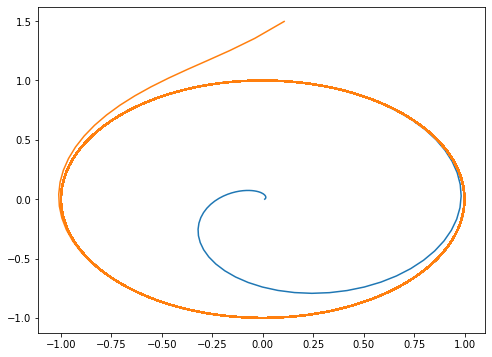

In [97]:
plt.plot(x11, x21)
plt.plot(x12, x22)